In [46]:
import urllib
import numpy as np
import matplotlib.pyplot as plt
import os

# Choose 10 classes

Prepare list of 10 classes from:
https://quickdraw.withgoogle.com/data

In [47]:
class_names=['banana', 'baseball bat', 'carrot', 'clarinet', 'crayon',
             'pencil','boomerang', 'hockey stick', 'fork', 'knife']

## Test

In [48]:
assert len(class_names)==10, 'There should be exactly 10 names'
for i in range(len(class_names)):
    assert type(class_names[i])==str, 'Each name should be of type str'
    assert '/' not in class_names[i], 'Only class names, with spaces, no slashes'

# Loading data
Download .npy image files (numpy)

In [49]:
for name in class_names:
    url = f'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/{name}.npy'
    file_name = url.split('/')[-1].split('?')[0]

    url = url.replace(' ','%20')
    
    if not os.path.isfile(file_name):
        print(url, '==>', file_name)
        urllib.request.urlretrieve(url, file_name)

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/banana.npy ==> banana.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball%20bat.npy ==> baseball bat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/carrot.npy ==> carrot.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/clarinet.npy ==> clarinet.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/crayon.npy ==> crayon.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pencil.npy ==> pencil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/boomerang.npy ==> boomerang.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/hockey%20stick.npy ==> hockey stick.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/fork.npy ==> fork.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/knife.npy ==> knife.npy


## Loading from .npy files

In [50]:
data = []
for name in class_names:
    file_name = name+'.npy'
    data.append(np.load(file_name, fix_imports=True, allow_pickle=True))
    print(f'{name:<15}{type(data[-1])}')

banana         <class 'numpy.ndarray'>
baseball bat   <class 'numpy.ndarray'>
carrot         <class 'numpy.ndarray'>
clarinet       <class 'numpy.ndarray'>
crayon         <class 'numpy.ndarray'>
pencil         <class 'numpy.ndarray'>
boomerang      <class 'numpy.ndarray'>
hockey stick   <class 'numpy.ndarray'>
fork           <class 'numpy.ndarray'>
knife          <class 'numpy.ndarray'>


# Number of images and their dimensions

In [51]:
for i, name in enumerate(class_names):
    print(f'{name:<15}{data[i].shape}')

banana         (307936, 784)
baseball bat   (123809, 784)
carrot         (132459, 784)
clarinet       (126214, 784)
crayon         (129953, 784)
pencil         (122001, 784)
boomerang      (142682, 784)
hockey stick   (130110, 784)
fork           (126077, 784)
knife          (172656, 784)


Visualize the number of photos per class below:

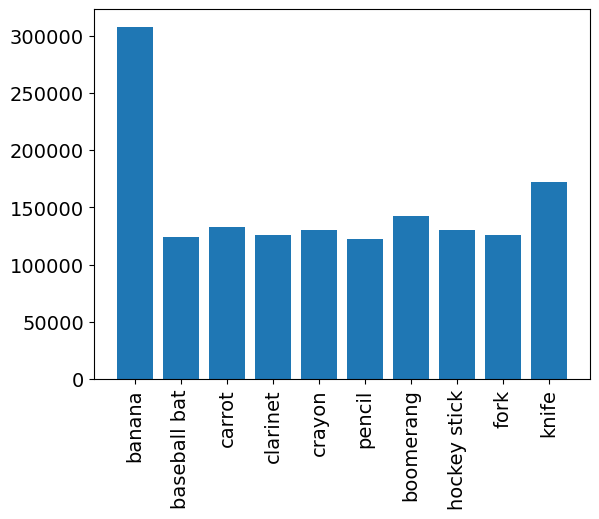

In [52]:
# Use bar plot for proper label alignment
counts = [class_data.shape[0] for class_data in data]

plt.bar(class_names, counts, align='center');
plt.xticks(rotation='vertical', fontsize=14);
plt.yticks(fontsize=14);
plt.show();

# Data visualization
## Conversion to (-1, 28, 28)

Using `np.reshape`

In [53]:
# for i in range(len(data)):
#     data[i] = data[i].reshape(-1, 28, 28)

Using `einops`

In [54]:
from einops import rearrange

for i in range(len(data)):
    data[i] = rearrange(data[i], 'b (h w) -> b h w', h=28)

## Display one example from each class

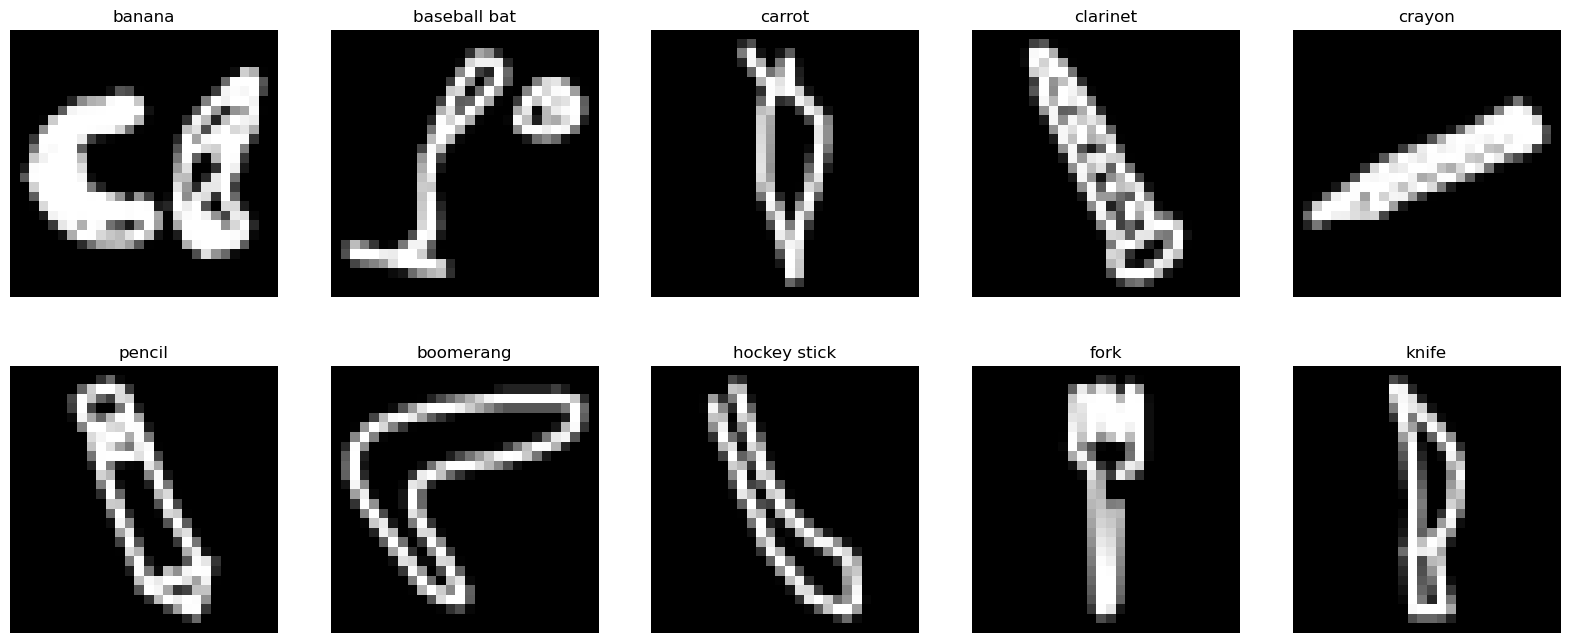

In [55]:
plt.figure(figsize=(20,8));

for i, name in enumerate(class_names):
    random_idx = np.random.randint(data[i].shape[0])
    plt.subplot(2,5,i+1)
    plt.imshow(data[i][random_idx], cmap='gray')
    plt.title(name)
    plt.axis('off')

## Mean image
How similar are the images from each class?

Calculate and display the mean image for all classes.

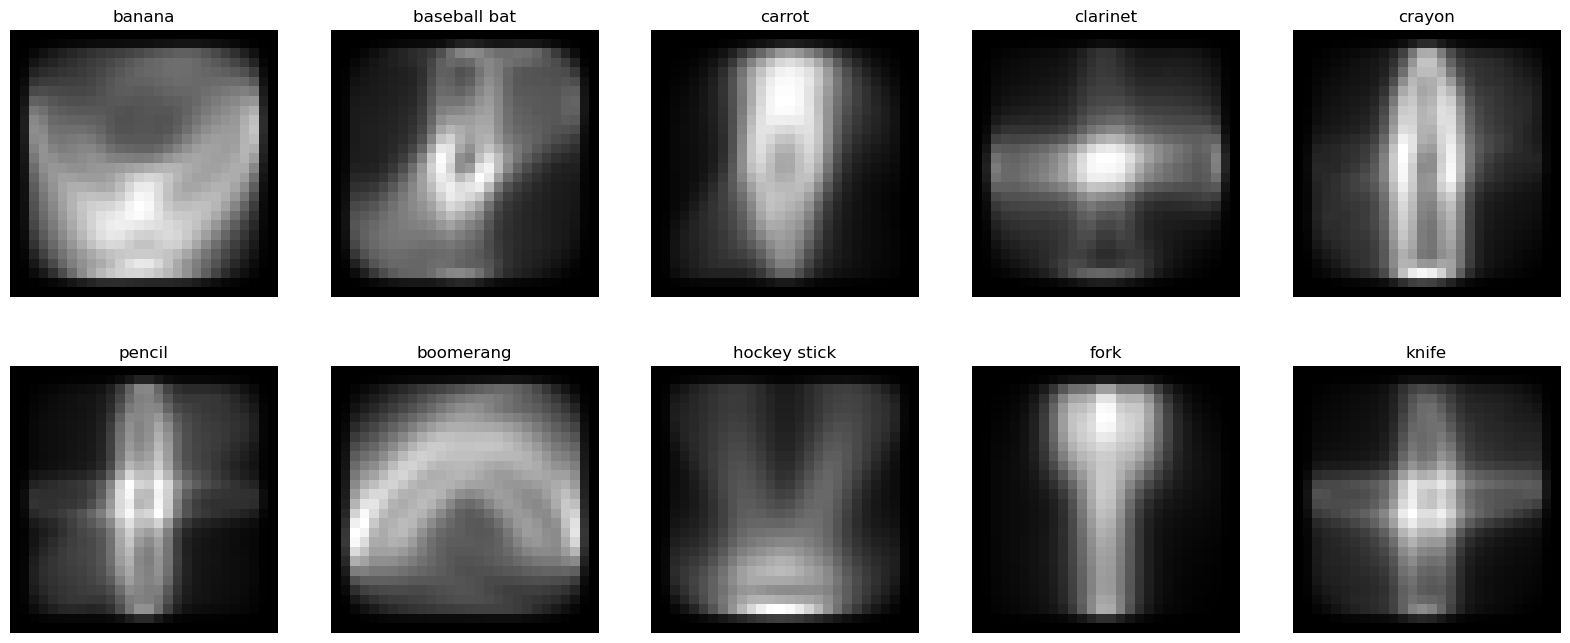

In [56]:
plt.figure(figsize=(20,8));

for i, name in enumerate(class_names):
    plt.subplot(2,5,i+1)
    mean_img = np.mean(data[i], axis=0)
    plt.imshow(mean_img, cmap='gray')
    plt.title(name)
    plt.axis('off')